### This notebook uses MIRNet model from 🤗 Model Hub to enhance Low Light Images using Keras

![](https://img.youtube.com/vi/JRdWOAqQaUc/hqdefault.jpg)

### Objective

The objective of the notebook is to showcase how simple and easy it is to use a pre-trained Keras model from Hugging Face and build a Deep Learning powered Tool 

Associated YouTube Tutorial -https://www.youtube.com/watch?v=JRdWOAqQaUc

Downloading and installing required libraries

In [1]:
! pip install keras

The pre-trained model wil be downloaded from Hugging Face Model Hub, hence we're installing `huggingface_hub`

In [2]:
! pip install huggingface_hub

These are the other two libraries used in this code but it's available with Kaggle Notebooks without Installations

In [3]:
#numpy
#Pillow

Loading required libraries

In [4]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [5]:
#from PIL import Image # Image processing

In [6]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub


Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/437M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219k [00:00<?, ?B/s]

In [7]:
#! wget

If you happen to read PNG images, it's possible they are read as `RGBA` with a transparency channel.Hence, while reading/opening the input image, we are converting it to `RGB` (removing the transparency channel).


In [8]:
#005e53b1b6aada 00354cd9244e28

low_light_img = Image.open('/kaggle/input/image1/lowlight.jpg').convert('RGB')

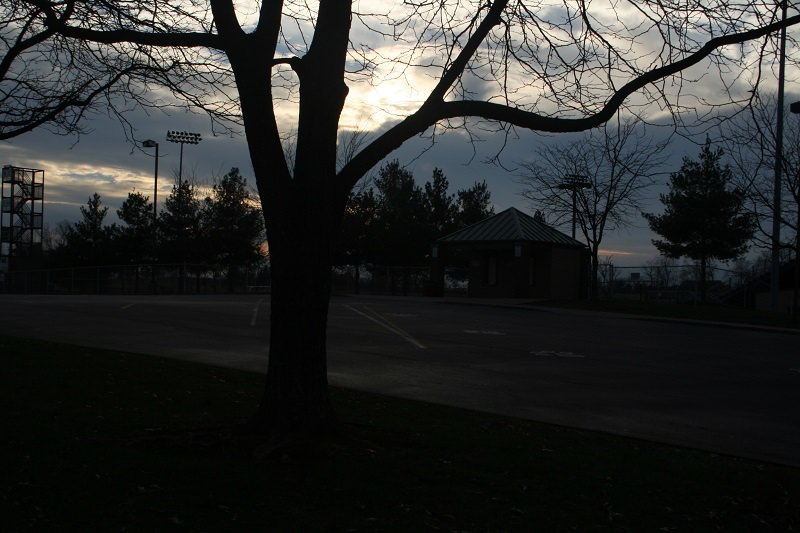

In [9]:
low_light_img

There are lot of different methods to resize the image, this is one of the simpler methods but I'd strongly encourage you to check other options here - https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters

In [10]:
low_light_img = low_light_img.resize((512,512),Image.NEAREST)

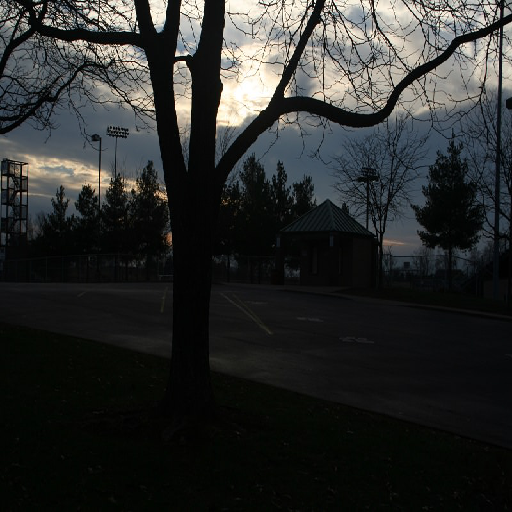

In [11]:
low_light_img

In [12]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [13]:
image.shape

(512, 512, 3)

In [14]:
image = image.astype('float32') / 255.0

In [15]:
image.shape

(512, 512, 3)

In [16]:
image = np.expand_dims(image, axis = 0)

In [17]:
image.shape

(1, 512, 512, 3)

In [18]:
output = model.predict(image) # model inference to enhance the low light pics

In [19]:
output_image = output[0] * 255.0

In [20]:
output_image.shape

(512, 512, 3)

In [21]:
output_image = output_image.clip(0,255)

In [22]:
output_image.shape

(512, 512, 3)

In [23]:
#output_image

In [24]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [25]:
output_image

array([[[154.31529 , 146.98294 , 119.64066 ],
        [228.45311 , 211.86377 , 124.25548 ],
        [210.8731  , 229.46072 , 255.      ],
        ...,
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[141.76157 , 151.07355 , 183.82312 ],
        [255.      , 255.      , 255.      ],
        [165.23878 , 212.46306 , 227.16342 ],
        ...,
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[255.      , 255.      , 255.      ],
        [255.      , 217.67029 , 164.26646 ],
        [102.11257 , 211.85794 , 242.41457 ],
        ...,
        [219.75027 , 255.      , 255.      ],
        [220.60245 , 250.19247 , 255.      ],
        [230.77628 , 202.92377 , 239.80927 ]],

       ...,

       [[ 54.00098 ,  57.854053,  43.260326],
        [ 73.61924 ,  71.6468  ,  47.938316],
        [ 68.48654 ,  

In [26]:
output_image = np.uint32(output_image)

In [27]:
#output_image

Final Image

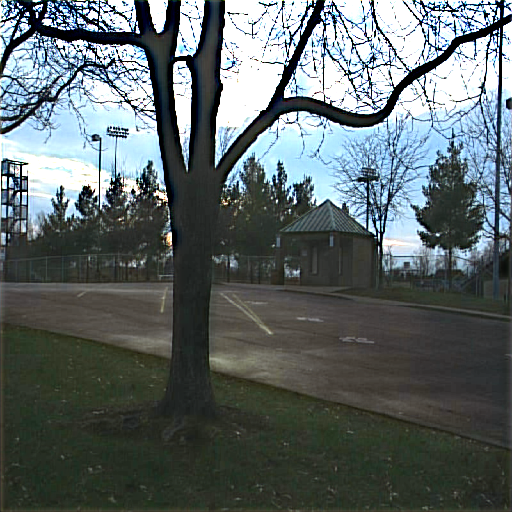

In [28]:
Image.fromarray(output_image.astype('uint8'),'RGB')

The end

# Resources

* [Low Light Image Enhancement in Python & Keras | Pixel-like NightMode using Deep Learning - Tutorial
](https://www.youtube.com/watch?v=JRdWOAqQaUc)

* [https://huggingface.co/keras-io/lowlight-enhance-mirnet](MIRnet on Hugging Face)

* [Mirnet Keras Documentation](https://keras.io/examples/vision/mirnet/)